In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
import os



In [6]:
# using os to read all csv files in the directory
def read_all_data(directory):
    all_files = os.listdir(directory)
    all_data = pd.DataFrame()
    for file in all_files:
        if file.endswith('.csv'):
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path, encoding='utf-8')
            all_data = pd.concat([all_data, df], ignore_index=True)
    return all_data

In [13]:
df = read_all_data('./Data/')

print(df.shape)


(7095, 6)


In [15]:
df.head()

,Unnamed: 0,product_name,review_text,product_rating,review_date,avg_rating
0,0,Microsoft Xbox Series S – 1TB White,The series S will set you up to game for years...,5,10/31/2024,4.8
1,1,Microsoft Xbox Series S – 1TB White,"Ordered Xbox series S, received a PS5 controll...",5,12/17/2024,4.8
2,2,Microsoft Xbox Series S – 1TB White,"This product is absolutely amazing, the loadin...",5,2/1/2025,4.8
3,3,Microsoft Xbox Series S – 1TB White,This console works fantastic. I was easily abl...,5,11/1/2024,4.8
4,4,Microsoft Xbox Series S – 1TB White,This product was the least expensive from the ...,5,12/11/2024,4.8


In [16]:
# using .info() to get the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7095 non-null   int64  
 1   product_name    7095 non-null   object 
 2   review_text     7069 non-null   object 
 3   product_rating  7095 non-null   int64  
 4   review_date     7095 non-null   object 
 5   avg_rating      7095 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 332.7+ KB


### DataFrame Overview

The dataset `df` contains **7095 rows** and **6 columns**. Below is a detailed explanation of the columns and their characteristics:

1. **Unnamed: 0**: 
  - Type: Integer
  - Description: index or identifier for each row.

2. **product_name**: 
  - Type: String
  - Description: Contains the names of the products being reviewed.

3. **review_text**: 
  - Type: String
  - Description: Contains the text of the reviews. 
  - Note: This column has **7069 non-null values**, indicating some missing data.

4. **product_rating**: 
  - Type: Integer
  - Description: Represents the rating given to the product (e.g., 1 to 5).

5. **review_date**: 
  - Type: String
  - Description: Represents the date when the review was submitted. 
  - Note: This column may need to be converted to a datetime format for further analysis.

6. **avg_rating**: 
  - Type: Float
  - Description: Represents the average rating of the product.

### Summary Statistics
- **Total Rows**: 7095
- **Total Columns**: 6

### Observations
- The `review_text` column contains some missing values, which we will need to be handled during data preprocessing.
- The `review_date` column is currently stored as a string and will require conversion to a datetime format for time-based analysis.
- The dataset provides a comprehensive view of product reviews, including textual feedback, ratings, and submission dates, making it suitable for sentiment analysis, trend analysis, and other exploratory tasks.

# Data Preprocessing

In [ ]:
# checking for the sum of null values in each column
df.isnull().sum() 

Unnamed: 0         0
product_name       0
review_text       26
product_rating     0
review_date        0
avg_rating         0
dtype: int64

In [18]:
# dropping columns with missing values
df.dropna(axis=1, inplace=True)

In [23]:
# converting the 'review_date' column to datetime format
df['review_date'] = pd.to_datetime(df['review_date'], format='%m/%d/%Y', errors='coerce')
# checking the data types again after conversion  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7095 non-null   int64         
 1   product_name    7095 non-null   object        
 2   product_rating  7095 non-null   int64         
 3   review_date     7095 non-null   datetime64[ns]
 4   avg_rating      7095 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 277.3+ KB


In [24]:
df['review_date'].min(), df['review_date'].max()

(Timestamp('2008-12-14 00:00:00'), Timestamp('2025-02-10 00:00:00'))

## EDA

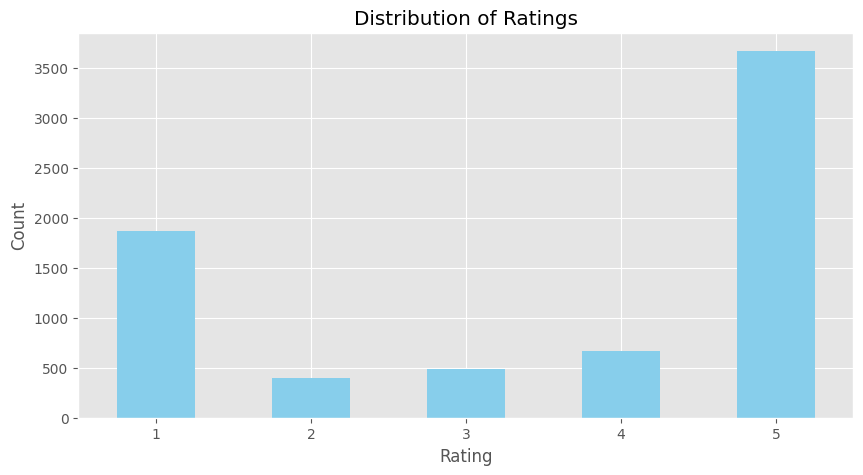

In [25]:
# checking the distribution of ratings    
df['product_rating'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Distribution of Ratings')  
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


1. **Rating 5 Dominates**: The highest bar corresponds to a rating of 5, indicating that most customers gave the highest rating to the products.
2. **Lower Ratings are Less Frequent**: Ratings 1 and 2 have significantly fewer reviews, suggesting that fewer customers were dissatisfied with the products.
3. **Balanced Mid-Ratings**: Ratings 3 and 4 have moderate counts, showing a balanced distribution of neutral to positive feedback.
4. **Overall Sentiment**: The chart suggests a generally positive sentiment among reviewers, as higher ratings (4 and 5) dominate the distribution.

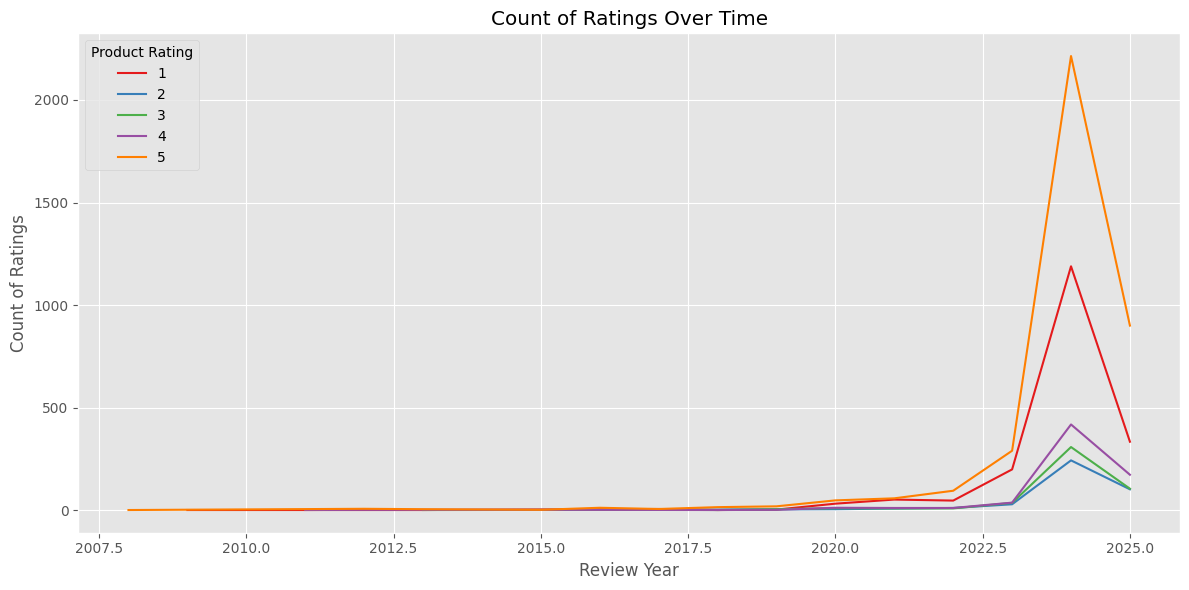

In [34]:
# count of rating over time coloer coded by rating
df['review_year'] = df['review_date'].dt.year 
fig = plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='review_year',y='product_rating', hue='product_rating', estimator='count', errorbar=None, palette='Set1')
plt.title('Count of Ratings Over Time')
plt.xlabel('Review Year')
plt.ylabel('Count of Ratings')
plt.legend(title='Product Rating')
plt.tight_layout()
plt.show()